Mean Squared Error

- Mean Squared Error calculates the average of the squared difference between predict & actual values.
- It penalizeslarge errors more heavily than smaller ones.

In [6]:
# mlp for regression with mae loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

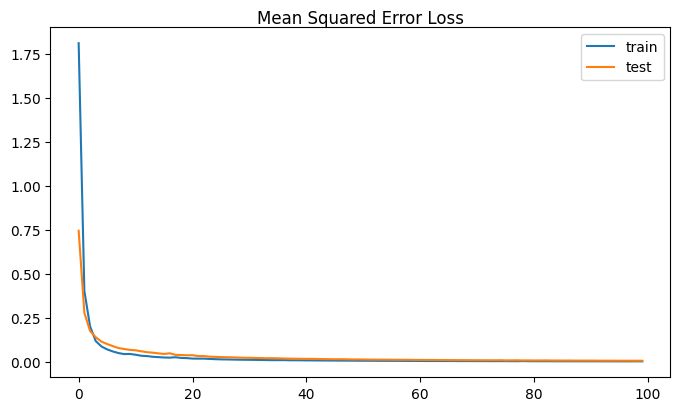

In [7]:
# Generating the Regression Dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# Standardizing the Dataset
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# Observations
n_train = 500

# Splitting the Data into Training & Testing
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Building the model
model = Sequential()
model.add(Dense(25, input_dim=20, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(1, activation="linear"))

# Compile the model with Mean Squared Error (MSE) as the loss function and MSE as the only metric
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mse"])

# Fitting the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=100)

# Evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)

# Displaying the results
print("Train: %.3f, Test: %.3f" % (train_mse, test_mse))

# Plotting MSE Loss Function During Training
pyplot.figure(figsize=(8, 10))
pyplot.subplot(211)
pyplot.title('Mean Squared Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
